In [83]:
%matplotlib inline 

In [84]:
import matplotlib.pyplot as plt
import numpy as np

In [85]:
N = 500
xm, xM = -1.0, 1.0
ym, yM = -1.0, 1.0
x = np.linspace(xm, xM, N)
y = np.linspace(ym, yM, N)
X, Y = np.meshgrid(x, y, indexing='ij')
cl_mp =['Reds', 'Greens', 'Blues', 'Purples', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
col_plot = ['r','g', 'b','m']
markers = ['s', '*', 'v', 's', '.']

In [202]:
ands = 1
mu, sigma = 0.0, 1.0 
a = np.random.normal(loc=mu, scale=sigma,size=(ands,2))
an = np.array(map(lambda x: x/np.linalg.norm(x), a))
print (an)
r = 0.5 
b = 0.0*np.random.uniform(low=0,high=r,size=(ands,1))
print (b)

[[ 0.15644027  0.98768742]]
[[ 0.]]


In [203]:
Z = np.zeros(shape=(N,N,ands+1))

In [204]:
dic_pos = dict.fromkeys(range(N*N))

In [205]:
xstr = lambda s: '' if s is None else str(s)

In [206]:
for z, (aa, bb) in enumerate (zip (an,b)):
    k_idx = 0.0 
    for i, (xx, yy) in enumerate (zip(X,Y)):
        for j, (xxu, yyu) in enumerate (zip (xx,yy)):
            
            v = np.array([xxu, yyu])
            h_fun = int(np.floor((v.dot(aa) +bb )/ r))
            Z[i,j,z] = h_fun
            dic_pos[k_idx] = xstr(dic_pos[k_idx]) + str(h_fun)
            k_idx += 1
            

In [207]:
len(dic_pos)

250000

In [208]:
buckets = set (dic_pos.values())

In [209]:
print (len(buckets))

6


In [210]:
sign_values =  dict.fromkeys(buckets)

In [211]:
vals = np.linspace(0, 100, len(buckets))
vals = vals

In [212]:
for k,v in zip(sign_values.keys(),vals):
    sign_values[k] = v

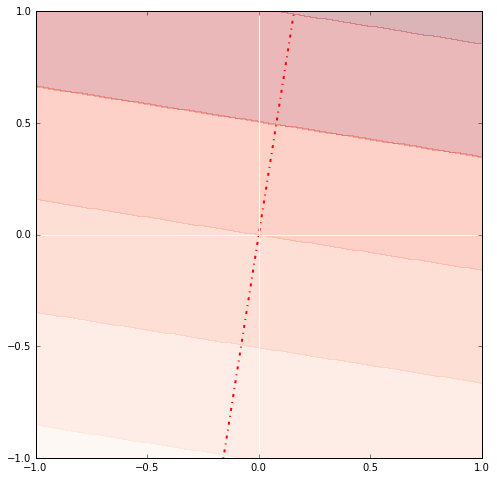

In [213]:
fig, axs = plt.subplots(ncols=1, figsize=(8,8))
for fz,cm, cp, aa in zip(range (ands), cl_mp, col_plot, an):
    cs = axs.contourf(X, Y, Z[:,:,fz], cmap = plt.get_cmap(cm), alpha = 0.3, label='Line '+str(fz))
    m = (aa[1]- b[fz])/(aa[0]-0) 
    axs.plot(x,x*m + b[fz], c=col_plot[fz], lw=2, linestyle= '-.')
axs.set_xlim([xm,xM])
axs.set_ylim([ym,yM])
plt.axhline(0, color='white')
plt.axvline(0, color='white')

In [214]:
k_idx = 0.0 
for i, (xx, yy) in enumerate (zip(X,Y)):
    for j, (xxu, yyu) in enumerate (zip (xx,yy)):
        Z[i,j,ands] = sign_values[dic_pos[k_idx]]
        k_idx += 1

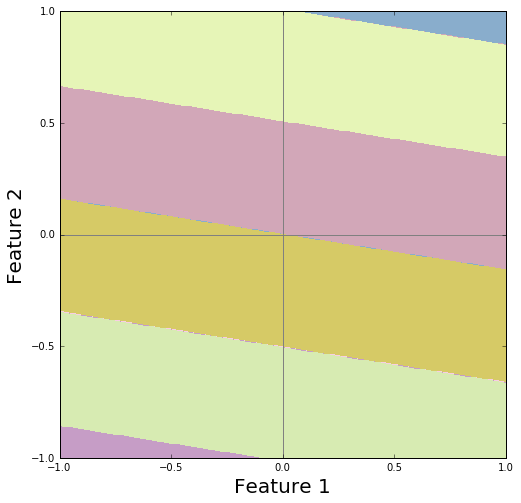

In [215]:
fig, axs = plt.subplots(ncols=1, figsize=(8,8))
cs = axs.contourf(X, Y, Z[:,:,ands], len(buckets), cmap = plt.get_cmap('Set3') )
f_size = 20

"""for fz, aa in enumerate(an): 
    m = (aa[1]- b[fz])/(aa[0]-0) 
    axs.plot(x,x*m + b[fz], c=col_plot[fz], lw=2, linestyle= '-.')
    axs.set_xlim([xm,xM])
    axs.set_ylim([ym,yM])
"""
axs.set_ylabel("Feature 2", fontsize=f_size)
axs.set_xlabel("Feature 1", fontsize=f_size)
axs.axhline(0, color='gray')
axs.axvline(0, color='gray')
fig.show()
fig.savefig('Euclidean_'+ str(ands)+ 'ands.eps', dpi=150)

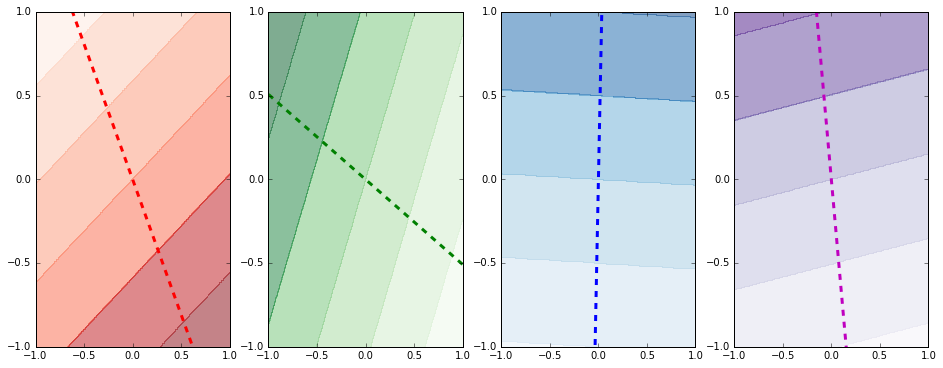

In [174]:
fig, axs = plt.subplots(ncols=ands, figsize=(16,6))
for fz, (ax, aa) in enumerate (zip(axs, an)):
    cs = ax.contourf(X, Y, Z[:,:,fz], cmap = plt.get_cmap(cl_mp[fz]), alpha = 0.5)
    m = (aa[1]- b[fz])/(aa[0]-0) 
    ax.plot(x,x*m + b[fz], c=col_plot[fz], lw=3, linestyle= '--')
    ax.set_xlim([xm,xM])
    ax.set_ylim([ym,yM])

## Cosine distance

In [217]:
a_cosine = np.random.normal(loc=mu, scale=sigma,size=(ands,2)) #a  #np.random.normal(loc=mu, scale=sigma,size=(ands,2)) #
an_cosine =   np.array(map(lambda x: x/np.linalg.norm(x), a_cosine)) #an
print (an_cosine)

[[-0.89477548  0.44651634]]


In [218]:
Zcosine = np.zeros(shape=(N,N,ands+1))

In [219]:
dic_pos_cosine = dict.fromkeys(range(N*N))

In [220]:
for z, aa in enumerate (an_cosine):
    k_idx = 0.0 
    for i, (xx, yy) in enumerate (zip(X,Y)):
        
        for j, (xxu, yyu) in enumerate (zip (xx,yy)):
            v = np.array([xxu, yyu])
            #print(v)
            #print (aa)
            #print ( v.dot(aa))
            h_res = np.dot(aa,v)
            h_fun = 1 if h_res > 0 else 0
            #print h_fun
            Zcosine[i,j,z] = h_fun
            dic_pos_cosine[k_idx] = xstr(dic_pos_cosine[k_idx]) + str(h_fun)
            k_idx += 1

In [221]:
buckets_cosine = set (dic_pos_cosine.values())

In [222]:
num_regions = len(buckets_cosine)
print num_regions

2


In [223]:
unique_vals = np.unique(Zcosine[:,:,0])

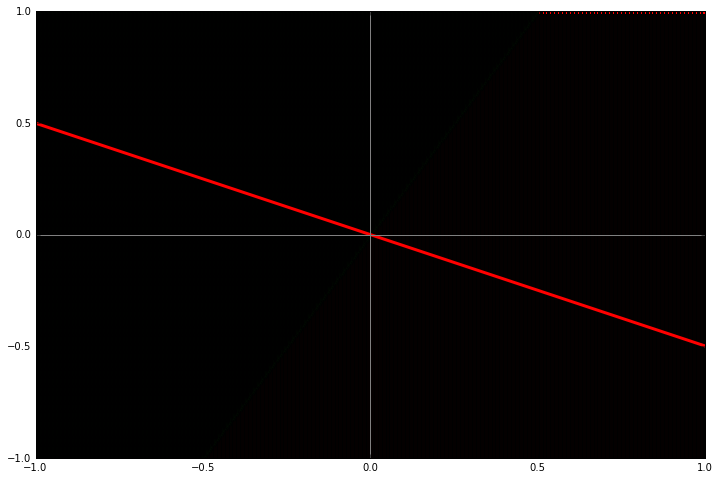

In [224]:
fig, axs = plt.subplots(ncols=1, figsize=(12,8))
for u,cl_plt, mk in zip(unique_vals, col_plot, markers):
    xsel = X[np.equal(Zcosine[:,:,0], u)]
    ysel = Y[np.equal(Zcosine[:,:,0], u)]
    axs.scatter(xsel,ysel,c=cl_plt, marker=mk, s=30)

m = (an_cosine[0][1]- 0)/(an_cosine[0][0]-0) 
axs.scatter(an_cosine[0][0],an_cosine[0][1], s=200, c='k', marker=',')
axs.plot(x,x*m, c=col_plot[fz], lw=3, linestyle= '-')
axs.set_xlim([xm,xM])
axs.set_ylim([ym,yM])
axs.axhline(0, color='gray')
axs.axvline(0, color='gray')

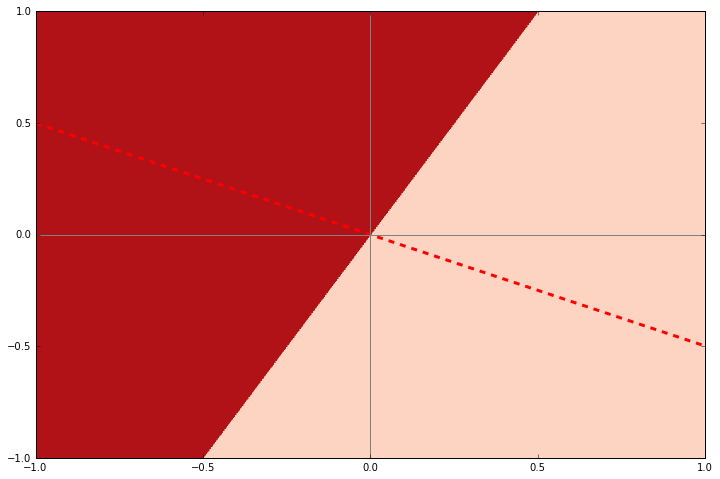

In [225]:
fig, axs = plt.subplots(ncols=1, figsize=(12,8))
for fz,cm, cp, aa in zip(range (ands), cl_mp, col_plot, an_cosine):
    cs = axs.contourf(X, Y, Zcosine[:,:,fz], num_regions, cmap = plt.get_cmap(cm), alpha = 1.0)
    m = (aa[1]- 0)/(aa[0]-0) 
    axs.plot(x,x*m, c=col_plot[fz], lw=3, linestyle= '--')
axs.set_xlim([xm,xM])
axs.set_ylim([ym,yM])
axs.axhline(0, color='gray')
axs.axvline(0, color='gray')

In [226]:
sign_values_cosine =  dict.fromkeys(buckets_cosine)

In [227]:
vals = np.linspace(0, 100, len(buckets_cosine))
vals = vals

In [228]:
for k,v in zip(sign_values_cosine.keys(), vals):
    sign_values_cosine[k] = v

In [229]:
k_idx = 0.0 
for i, (xx, yy) in enumerate (zip(X,Y)):
    for j, (xxu, yyu) in enumerate (zip (xx,yy)):
        Zcosine[j,i,ands] = sign_values_cosine[dic_pos_cosine[k_idx]]
        k_idx += 1

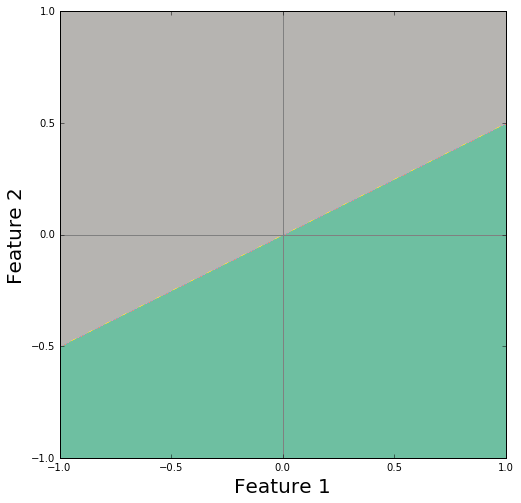

In [230]:
fig, axs = plt.subplots(ncols=1, figsize=(8,8))
cs = axs.contourf(X, Y, Zcosine[:,:,ands], 50, cmap = plt.get_cmap('Set2'))
f_size = 20

"""for fz, aa in enumerate (an): 
    m = (aa[1]- 0.0)/(aa[0]-0) 
    axs.plot(x,x*m, c=col_plot[fz], lw=2, linestyle= '-.')
    axs.set_xlim([xm,xM])
    axs.set_ylim([ym,yM])
"""
axs.set_ylabel("Feature 2", fontsize=f_size)
axs.set_xlabel("Feature 1", fontsize=f_size)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
fig.show()
fig.savefig('Cosine_'+ str(ands)+ 'ands.eps', dpi=150)

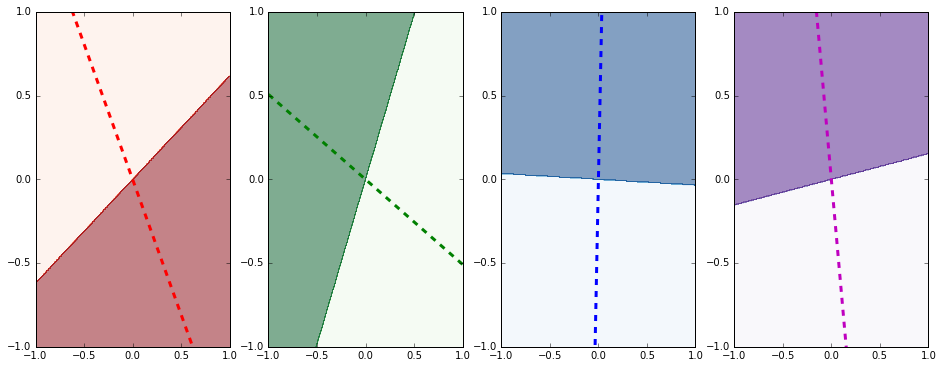

In [189]:
fig, axs = plt.subplots(ncols=ands, figsize=(16,6))
for fz, (ax, aa) in enumerate (zip(axs, an_cosine)):
    cs = ax.contourf(X, Y, Zcosine[:,:,fz], cmap = plt.get_cmap(cl_mp[fz]), alpha = 0.5)
    m = (aa[1]- 0)/(aa[0]-0) 
    ax.plot(x,x*m , c=col_plot[fz], lw=3, linestyle= '--')
    ax.set_xlim([xm,xM])
    ax.set_ylim([ym,yM])

### combination

In [231]:
dic_pos_both = dict.fromkeys(range(N*N))

In [232]:
k_idx = 0.0 
for i, (xx, yy) in enumerate (zip(X,Y)):
    for j, (xxu, yyu) in enumerate (zip (xx,yy)):
        h_fun = str(Zcosine[i,j,ands] ) + str (Z[i,j,ands]) 
        dic_pos_both[k_idx] = xstr(dic_pos_cosine[k_idx]) + h_fun
        k_idx += 1

In [233]:
buckets_boths = set (dic_pos_both.values())

In [234]:
print (len(buckets_boths))

16


In [235]:
sign_values_both =  dict.fromkeys(buckets_boths)
for k,v in zip(sign_values_both.keys(), range(len(buckets_boths))):
    sign_values_both[k] = v

In [236]:
Zboth = np.zeros(shape=(N,N))

In [237]:
k_idx = 0.0 
for i, (xx, yy) in enumerate (zip(X,Y)):
    for j, (xxu, yyu) in enumerate (zip (xx,yy)):
        Zboth[i,j] = sign_values_both[dic_pos_both[k_idx]]
        k_idx += 1

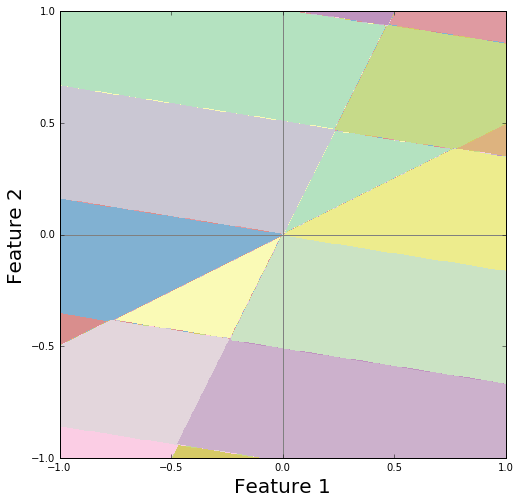

In [238]:
fig, axs = plt.subplots(ncols=1, figsize=(8,8))
cs = axs.contourf(X, Y, Zboth, len(buckets_boths), cmap = plt.get_cmap('Set3'))
f_size = 20

axs.set_ylabel("Feature 2", fontsize=f_size)
axs.set_xlabel("Feature 1", fontsize=f_size)
fig.show()
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
fig.savefig('Both_'+ str(ands)+ 'ands.eps', dpi=150)